# Bayesian inference of model parameters (binomial model)

The goal is to find the posterior probability distribution function (PDF) of the model parameters $ \theta $ given the observed data $ D $ and a chosen model class $ M $ :

$ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} $ 

Where:
*   $ p(\theta | D, M) $ : **Posterior PDF** - Our updated belief about $ \theta $ after seeing the data $ D $ , assuming model $ M $ .
*   $ p(D | \theta, M) $ : **Likelihood Function** - The probability (or density) of observing data $ D $ given specific parameters $ \theta $ and model $ M $ .
*   $ p(\theta | M) $ : **Prior PDF** - Our initial belief about $ \theta $ before seeing data $ D $ , assuming model $ M $ .
*   $ p(D | M) $ : **Evidence (or Marginal Likelihood)** - The probability (or density) of observing data $ D $ under model $ M $ , averaged over all possible $ \theta $ . It acts as a normalization constant.

**Example: Estimating Coin Bias**

Let's use a simple example: estimating the bias $ \theta $ (probability of heads) of a coin based on observed flips.

*   **Model $ M $ **: The Binomial/Bernoulli model. We assume the coin flips are independent Bernoulli trials with a fixed (but unknown) probability of heads $ \theta $ .
*   **Parameters $ \theta $ **: A single parameter, $ \theta \in [0, 1] $ , representing the probability of getting heads.
*   **Data $ D $ **: A sequence of coin flips. Let's say we flipped the coin $ n=10 $ times and observed $ k=7 $ heads. So, $ D = \{n=10, k=7\} $ .

Now let's provide Python examples for each term.


Libraries import

In [1]:
import numpy as np
from scipy.stats import beta, binom
from scipy.special import beta as beta_function # The Beta function B(a,b)
import matplotlib.pyplot as plt

Bernoulli experiment setup

In [2]:
# --- Example Setup ---
# Data D: Number of trials (n) and number of successes/heads (k)
n_trials = 10
n_heads = 7
data_D = {'n': n_trials, 'k': n_heads}

1.  **Parameters**

    1.  **`theta`**: In the context of this Bayesian inference example (estimating coin bias), `theta` ($ \theta $ ) represents the **parameter we are trying to estimate**. Specifically, it's the unknown probability of the coin landing heads. The possible values for a probability like this range from 0 (impossible to get heads) to 1 (guaranteed to get heads).

    2.  **`np.linspace()`**: This is a function from the NumPy library (`np`). Its purpose is to create an array of **evenly spaced numbers** over a specified interval.
        *   The first argument (`0`) is the **starting value** of the sequence.
        *   The second argument (`1`) is the **ending value** of the sequence.
        *   The third argument (`500`) is the **number of samples** (points) to generate within that interval `[0, 1]`.

    3.  **`theta_range`**: Therefore, this variable `theta_range` now holds a NumPy array containing 500 distinct values, starting at 0.0, ending at 1.0, and spaced equally apart.
        *   Example values in `theta_range` would look something like: `[0.0, 0.002004..., 0.004008..., ..., 0.99799..., 1.0]`

2.  **Why is this needed?**

    In Bayesian inference, we are interested in probability distributions (like the Prior PDF, Likelihood, and Posterior PDF) defined over the possible range of the parameter $ \theta $ .

    *   **Plotting:** To visualize these distributions (e.g., plotting the prior belief about $ \theta $ , or the final posterior distribution), we need to calculate the value of the PDF (or likelihood) at many different $ \theta $ values across its valid range [0, 1]. `theta_range` provides these x-axis values. Using 500 points helps create smooth-looking curves when plotted.
    *   **Numerical Integration (Potentially):** While not explicitly used for integration *in this specific snippet*, if we needed to calculate quantities like the evidence $ p(D|M) $ numerically (instead of using an analytical formula), we would integrate the product of the likelihood and prior over the range of $ \theta $ . `theta_range` could serve as the points for numerical integration methods (like the trapezoidal rule, although `scipy.integrate.quad` is often better).

    In short, `theta_range` creates a fine grid of possible values for the coin's bias $ \theta $ between 0 and 1, primarily so we can calculate and plot the shapes of the probability distributions involved in the Bayesian analysis.

3.  **Is `theta_range` all the possible values we could estimate?**

    **No, not exactly.**
    *   The *true* parameter $ \theta $ (the coin's bias) can theoretically be *any* real number between 0 and 1, inclusive. This is a continuous interval containing infinite possible values.
    *   `theta_range = np.linspace(0, 1, 500)` creates a **discrete grid** or **sampling** of 500 specific points *within* that continuous interval [0, 1]. These points are evenly spaced.
    *   The purpose of `theta_range` is **not** to list *every* possibility, but to provide a sufficiently dense set of points **across the range** of possibilities. We use these points primarily for:
        *   **Calculating:** Evaluating the Prior PDF, Likelihood function, and Posterior PDF at these specific points.
        *   **Plotting:** Using these calculated values to draw smooth curves representing the distributions. The more points, the smoother the curve appears.
        *   **Numerical Approximation (Sometimes):** If analytical solutions weren't available, we might use these points for numerical integration (like calculating the evidence $ p(D|M) $ using methods like the trapezoidal rule).

    Think of it like pixels on a screen: the screen uses a finite number of pixels to represent a potentially continuous image. `theta_range` is like the set of x-coordinates for the "pixels" we use to draw our probability distributions. The actual distributions (prior, posterior) are conceptually defined over the continuous [0, 1] range.

4.  **Is it better to increase `theta_range` (i.e., increase the number of points, like from 500 to 1000 or more)?**

    **It depends on the goal, but often 500 is sufficient for visualization:**

    *   **Advantage of Increasing:**
        *   **Smoother Plots:** More points lead to a visually smoother representation of the probability density curves, especially if the curve has sharp peaks or changes quickly.
        *   **Better Numerical Integration (if using grid-based methods):** If you were approximating an integral using these points directly (e.g., trapezoidal rule), more points generally yield a more accurate result.

    *   **Disadvantage of Increasing:**
        *   **More Computation:** Calculating the likelihood and PDFs at 1000 points takes roughly twice as long as calculating them at 500 points. For simple models this is trivial, but for complex models where each likelihood evaluation is expensive, this matters.
        *   **More Memory:** Storing the `theta_range` array and the corresponding PDF/likelihood values takes more memory. (Usually not a major concern for 1D problems).
        *   **Diminishing Returns:** Going from 50 points to 500 makes a big visual difference. Going from 500 to 5000 might make the curve look negligibly smoother for most typical distributions, while significantly increasing computation.

    **Conclusion:** For the purpose of *visualizing* relatively well-behaved 1D distributions like the Beta or Gaussian PDFs in these examples, 200-500 points is usually perfectly adequate to get a good sense of the shape. Increasing it much further rarely adds significant visual insight and increases computation unnecessarily. If you needed highly accurate *numerical integration*, you might increase the number of points, but often using dedicated integration functions (like `scipy.integrate.quad`) that adaptively choose evaluation points is more efficient than just using a denser fixed grid.

So, `theta_range` is a practical tool for working with continuous distributions on a computer, providing a grid for calculation and plotting. 500 points is a reasonable choice for good visualization without excessive computation in this context.

## 1. Prior PDF: $ p(\theta | M) $ 

This represents our belief about the coin's bias $ \theta $ *before* we see any flips. A common choice is a Beta distribution, $ \text{Beta}(\alpha, \beta) $ , because it's defined on $ [0, 1] $ and is the conjugate prior for the Binomial likelihood. Let's choose an uninformative prior, like $ \text{Beta}(1, 1) $ , which is equivalent to a Uniform distribution on $ [0, 1] $ .

*   **Meaning**: Initially, we believe all values of $ \theta $ between 0 and 1 are equally likely.
*   **Mathematical Form**: $ p(\theta | M) = \text{Beta}(\theta | \alpha_0, \beta_0) $ . Here, $ \alpha_0 = 1, \beta_0 = 1 $ . </br>
    $ p(\theta | M) = \frac{\Gamma(\alpha_0 + \beta_0)}{\Gamma(\alpha_0)\Gamma(\beta_0)} \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1}$ 

$ p(\theta | M) = 1$ si $ \alpha_0 = 1, \beta_0 = 1 $ .

In [3]:
# A specific parameter value we might evaluate things at
theta_example = 0.6
# A range of theta values for potential plotting or integration
theta_range = np.linspace(0, 1, 500)

--- 1. Prior PDF p(θ|M) ---


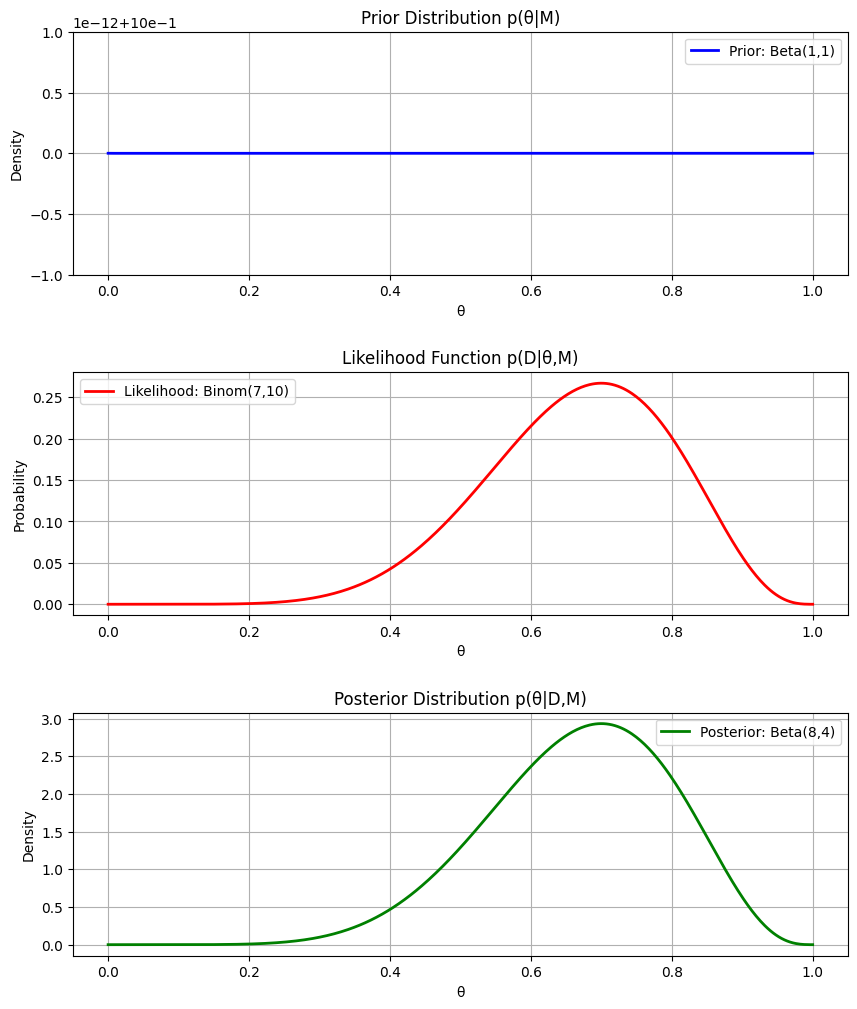

In [4]:
# --- Model M implicitly assumes Bernoulli trials ---
# Model M is represented here by the choice of prior and likelihood functions

# --- Term 1: Prior PDF p(θ|M) ---
print("--- 1. Prior PDF p(θ|M) ---")

# Set up the plot parameters
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4)

# 1. Plot Prior (using Beta(1,1) which is uniform)
prior = beta.pdf(theta_range, a=1, b=1)
axes[0].plot(theta_range, prior, 'b-', lw=2, label='Prior: Beta(1,1)')
axes[0].set_title('Prior Distribution p(θ|M)')
axes[0].set_xlabel('θ')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# 2. Plot Likelihood
likelihood = binom.pmf(data_D['k'], data_D['n'], theta_range)
axes[1].plot(theta_range, likelihood, 'r-', lw=2, label=f'Likelihood: Binom({data_D["k"]},{data_D["n"]})')
axes[1].set_title('Likelihood Function p(D|θ,M)')
axes[1].set_xlabel('θ')
axes[1].set_ylabel('Probability')
axes[1].legend()
axes[1].grid(True)

# 3. Plot Posterior (using Beta(k+1,n-k+1))
posterior = beta.pdf(theta_range, a=data_D['k']+1, b=data_D['n']-data_D['k']+1)
axes[2].plot(theta_range, posterior, 'g-', lw=2, label=f'Posterior: Beta({data_D["k"]+1},{data_D["n"]-data_D["k"]+1})')
axes[2].set_title('Posterior Distribution p(θ|D,M)')
axes[2].set_xlabel('θ')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True)

plt.show()

In [6]:
# --- Term 2: Likelihood p(D|θ,M) ---
# print("--- 2. Likelihood p(D|θ,M) ---")

**1. What the Expression Represents: The Beta Distribution**

$ p(\theta | M) = \frac{\Gamma(\alpha_0 + \beta_0)}{\Gamma(\alpha_0)\Gamma(\beta_0)} \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1} $ 
is the **Probability Density Function (PDF)** of the **Beta distribution**.

*   **$ p(\theta | M)$ **: This notation often appears in Bayesian statistics.
    *   $ \theta$ (theta) is a parameter we are interested in. Because its domain is specified as $ \theta \in [0, 1]$ , it typically represents a probability or a proportion (e.g., the probability of success in a Bernoulli trial, like the bias of a coin).
    *   $ M$ represents the "Model" or prior information/assumptions.
    *   $ p(\theta | M)$ reads as "the probability density of $ \theta$ given the model M". In a Bayesian context, this specific form often represents the **prior distribution** for the parameter $ \theta$ . It encodes our beliefs about $ \theta$ *before* observing any data.
*   **$ \alpha_0, \beta_0$ **: These are the **parameters** (or **hyperparameters** in a Bayesian context) of the Beta distribution. They must be positive ($ \alpha_0 > 0, \beta_0 > 0$ ). They control the *shape* of the distribution, reflecting different prior beliefs about $ \theta$ .
    *   If $ \alpha_0 = \beta_0$ , the distribution is symmetric around $ \theta = 0.5$ .
    *   If $ \alpha_0 > \beta_0$ , the distribution is skewed towards 1.
    *   If $ \alpha_0 < \beta_0$ , the distribution is skewed towards 0.
    *   Larger values of $ \alpha_0$ and $ \beta_0$ make the distribution more peaked (representing stronger prior beliefs).
*   **$ \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1}$ **: This part defines the basic shape of the distribution over the interval $ \theta \in [0, 1]$ .
*   **$ \Gamma(\cdot)$ **: This is the **Gamma function**, a generalization of the factorial function to real numbers (where $ \Gamma(n) = (n-1)!$ for positive integers $ n$ ).
*   **$ \frac{\Gamma(\alpha_0 + \beta_0)}{\Gamma(\alpha_0)\Gamma(\beta_0)}$ **: This is the **normalizing constant**. Its purpose is to ensure that the total area under the curve of the PDF, when integrated over the entire domain of $ \theta$ (which is [0, 1]), equals exactly 1. This is a fundamental requirement for any probability density function.

**2. The Claim: "$ = 1$ for $ \theta \in [0, 1] $ " - Is it True?**

**No, the statement that this PDF is equal to 1 for *all* $ \theta \in [0, 1]$ is generally incorrect.**

The PDF $ p(\theta | M)$ gives the *relative likelihood* of different values of $ \theta$ . It is a function of $ \theta$ , and its value changes as $ \theta$ changes (unless $ \alpha_0=1$ and $ \beta_0=1$ ).

**The Special Case: Beta(1, 1) - The Uniform Distribution**

There is one specific case where the PDF *is* equal to 1 over the interval [0, 1]: when $ \alpha_0 = 1$ and $ \beta_0 = 1$ . Let's plug these values in:

$ p(\theta | M) = \frac{\Gamma(1 + 1)}{\Gamma(1)\Gamma(1)} \theta^{1-1} (1-\theta)^{1-1} $ 
$ p(\theta | M) = \frac{\Gamma(2)}{\Gamma(1)\Gamma(1)} \theta^{0} (1-\theta)^{0} $ 

Since $ \Gamma(2) = 1! = 1$ and $ \Gamma(1) = 0! = 1$ , and anything to the power of 0 is 1:

$ p(\theta | M) = \frac{1}{1 \cdot 1} \cdot 1 \cdot 1 = 1 $ 

So, for $ \alpha_0 = 1$ and $ \beta_0 = 1$ , the Beta distribution becomes $ p(\theta | M) = 1$ for $ \theta \in [0, 1]$ . This is the **Uniform distribution** on [0, 1], often written as $ U(0, 1)$ . This specific prior represents a state of "maximum ignorance" or indifference, where all values of $ \theta$ between 0 and 1 are considered equally likely *a priori*.

**3. What *is* True for all Beta distributions? The Integral is 1**

While the PDF itself is not generally equal to 1, the **integral** of the PDF over its entire domain *must* equal 1:

$ \int_0^1 p(\theta | M) d\theta = \int_0^1 \frac{\Gamma(\alpha_0 + \beta_0)}{\Gamma(\alpha_0)\Gamma(\beta_0)} \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1} d\theta = 1 $ 

This is true for *any* valid parameters $ \alpha_0 > 0$ and $ \beta_0 > 0$ . The normalizing constant $ \frac{\Gamma(\alpha_0 + \beta_0)}{\Gamma(\alpha_0)\Gamma(\beta_0)}$ is specifically calculated to make this integral equal to 1. (This constant is the reciprocal of the Beta function, $ B(\alpha_0, \beta_0)$ ).

**In Summary:**

*   The expression is the PDF of the Beta($ \alpha_0, \beta_0$ ) distribution, commonly used as a prior for parameters $ \theta$ that lie between 0 and 1.
*   The statement that the PDF equals 1 for all $ \theta \in [0, 1]$ is **only true for the specific case** where $ \alpha_0 = 1$ and $ \beta_0 = 1$ , which corresponds to the Uniform(0, 1) distribution.
*   For any other valid $ \alpha_0, \beta_0$ , the PDF value will vary with $ \theta$ .
*   What is always true is that the **total area under the PDF curve**, i.e., the integral from 0 to 1, is equal to 1. This signifies that the total probability over all possible values of $ \theta$ is 1.

## 2. Likelihood Function: $ p(D | \theta, M) $ 

This function describes the probability of observing the data $ D $ (our sequence of coin flips) given a *specific* value of the coin's bias $ \theta $ . Assuming the flips are independent Bernoulli trials, the likelihood of observing $ H $ heads and $ T = N-H $ tails in $ N $ flips follows a Binomial distribution form.

*   **Meaning**: It quantifies how well a particular hypothesis $ \theta $ explains the observed data $ D $ . For example, if we observe 9 heads in 10 flips, a $ \theta $ value close to 0.9 will have a higher likelihood than a $ \theta $ value close to 0.1.
*   **Mathematical Form**: Let $ D $ be the observation of $ H $ heads in $ N $ flips.
    $ p(D | \theta, M) \propto \theta^H (1-\theta)^{N-H} $ .
    (Note: We often drop the binomial coefficient $ \binom{N}{H} $ here because it doesn't depend on $ \theta $ and will be part of the normalization constant in Bayes' theorem).

## 2. Likelihood Function: $ p(D | \theta, M) $ 

This represents the probability of observing our specific data ($ k=7 $ heads in $ n=10 $ flips) given a *particular* value of the coin's bias $ \theta $ . For a fixed $ D $ , we view this as a function of $ \theta $ . The standard function here is the Binomial probability mass function (PMF).

*   **Meaning**: How well does a specific hypothesis $ \theta $ explain the observed data $ D $ ?
*   **Mathematical Form**: $ p(D | \theta, M) = \binom{n}{k} \theta^k (1-\theta)^{n-k} $ 

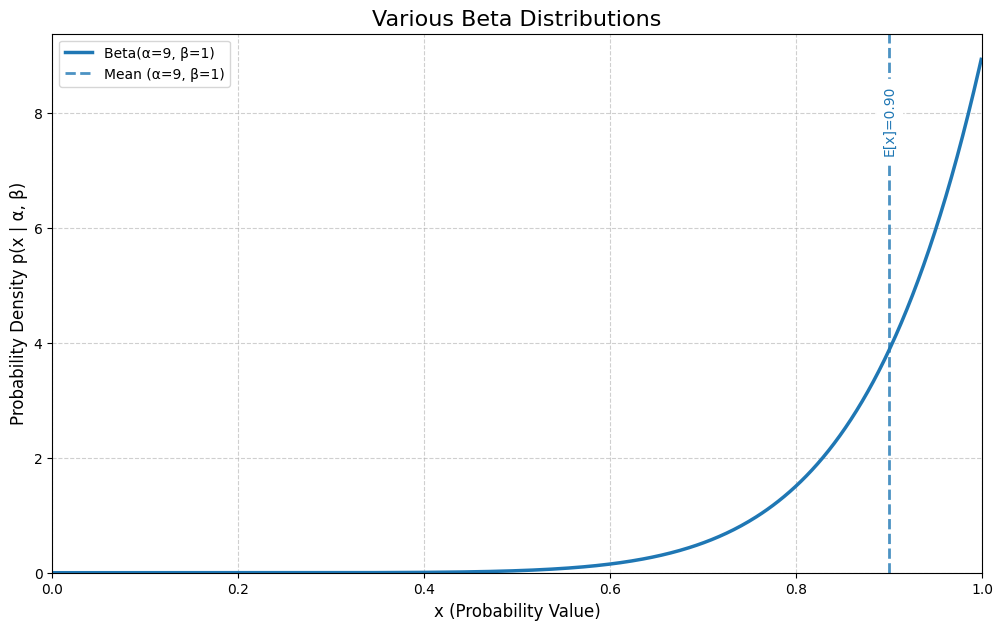

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range of x values (probabilities from 0 to 1)
# Avoid exact 0 and 1 for cases where alpha or beta < 1 (PDF goes to infinity)
x = np.linspace(0.001, 0.999, 500)

# --- Parameter Pairs to Plot ---
params = [
    (9, 1)     # Skewed towards 1 (belief in heads bias)
]

# --- Create the Plot ---
plt.figure(figsize=(12, 7))

for alpha_val, beta_val in params:
    # Calculate the PDF using scipy.stats.beta
    y = beta.pdf(x, alpha_val, beta_val)
    
    # Plot the PDF
    line, = plt.plot(x, y, label=f"Beta(α={alpha_val}, β={beta_val})", lw=2.5) # lw for linewidth

    # Calculate and plot the mean
    mean = alpha_val / (alpha_val + beta_val)
    plt.axvline(mean, color=line.get_color(), linestyle='--', lw=2, alpha=0.8,
                label=f"Mean (α={alpha_val}, β={beta_val})")
    # Add expected value as a text annotation
    plt.text(mean, max(y)*0.95, f"E[x]={mean:.2f}", color=line.get_color(),
             ha='center', va='top', fontsize=10, rotation=90, backgroundcolor='white')
    # plt.axvline(mean, color=line.get_color(), linestyle='--', lw=2, alpha=0.8)

# --- Customize the Plot ---
plt.title("Various Beta Distributions", fontsize=16)
plt.xlabel("x (Probability Value)", fontsize=12)
plt.ylabel("Probability Density p(x | α, β)", fontsize=12)

# Set axis limits - might need adjustment depending on peak heights
plt.xlim(0, 1)
plt.ylim(bottom=0, top=max(7, plt.ylim()[1])) # Ensure y starts at 0, adjust top if needed

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Show the Plot ---
plt.show()

## 3. Posterior PDF: $ p(\theta | D, M) $ 

This represents our updated belief about the coin's bias $ \theta $ *after* observing the data $ D $ . It is calculated using Bayes' theorem, combining the prior belief and the likelihood.

$ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} \propto p(D | \theta, M) p(\theta | M) $ 

This proportionality statement provides a standard way to find the shape of the posterior by ignoring the evidence term $ p(D|M)$ .

The kernel of the Binomial likelihood $ p(D | \theta, M)$ (where D represents H successes in N trials) is identified as $ \theta^H (1-\theta)^{N-H}$ .

The kernel of the Beta prior $ p(\theta | M) = \text{Beta}(\theta | \alpha_0, \beta_0)$ is identified as $ \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1}$ .

*   **Meaning**: The posterior distribution synthesizes our initial beliefs with the evidence provided by the data. It represents our state of knowledge about $ \theta $ after the experiment.
*   **Mathematical Form**: Combining the Beta prior and Binomial likelihood:
    $ p(\theta | D, M) \propto [\theta^H (1-\theta)^{N-H}] \times [\theta^{\alpha_0-1} (1-\theta)^{\beta_0-1}] $ 
    $ p(\theta | D, M) \propto \theta^{H + \alpha_0 - 1} (1-\theta)^{N - H + \beta_0 - 1} $ 
    This has the form of a Beta distribution. Therefore, the posterior is:
    $ p(\theta | D, M) = \text{Beta}(\theta | \alpha_N, \beta_N) $ , where the updated parameters are:
    $ \alpha_N = \alpha_0 + H $ 
    $ \beta_N = \beta_0 + (N - H) $ 
    Using our specific prior $ \alpha_0 = 1, \beta_0 = 1 $ :
    $ \alpha_N = 1 + H $ 
    $ \beta_N = 1 + N - H $ 
    The normalized posterior PDF is:
    $ p(\theta | D, M) = \frac{\Gamma(\alpha_N + \beta_N)}{\Gamma(\alpha_N)\Gamma(\beta_N)} \theta^{\alpha_N-1} (1-\theta)^{\beta_N-1} $ 
    $ p(\theta | D, M) = \frac{\Gamma(N + 2)}{\Gamma(H + 1)\Gamma(N - H + 1)} \theta^{H} (1-\theta)^{N - H} $ for $ \theta \in [0, 1] $ .

### Some clarification:

Why 'M' doesn't appear as a variable within the final mathematical expressions for the posterior parameters ($ \alpha_N$ , $ \beta_N$ ) or the posterior PDF itself?

1.  **Notation vs. Calculation:** 'M' appears in the *notation* (like $ p(\theta | D, M)$ ) to explicitly state that all these probabilities are *conditional on the assumed model*.
2.  **What 'M' Represents:** In this context, 'M' represents the **Beta-Binomial Model**. This model choice entails specific assumptions:
    *   The likelihood function is Binomial: $ p(D | \theta, M) = \binom{N}{H} \theta^H (1-\theta)^{N-H}$ .
    *   The prior distribution for $ \theta$ is Beta: $ p(\theta | M) = \text{Beta}(\theta | \alpha_0, \beta_0)$ .
    *   Often, the specific hyperparameters (like $ \alpha_0=1, \beta_0=1$ in your example) are also considered part of the model specification 'M'.
3.  **Implicit Embedding:** 'M' is **implicitly embedded** in the equations through the *choice* of these specific functions (Binomial likelihood, Beta prior).
    *   When you write $ p(D | \theta, M) \propto \theta^H (1-\theta)^{N-H}$ , you have *already used* the information from M (that it's a Binomial likelihood).
    *   When you write $ p(\theta | M) \propto \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1}$ , you have *already used* the information from M (that it's a Beta prior with specific $ \alpha_0, \beta_0$ ).
    *   The final posterior form $ p(\theta | D, M) = \text{Beta}(\theta | \alpha_N, \beta_N)$ is a *direct consequence* of choosing this specific model M.

**In Summary:**

*   'M' is present in the **conditional notation** to remind us of the underlying model assumptions.
*   'M' is **not a variable** in the calculations themselves.
*   The **functional forms** of the likelihood and prior used in the calculations *are* the embodiment of the model 'M'.

The notation $ p(\cdot | M)$ is particularly important in **Bayesian model comparison**, where you might compare different models (e.g., Model $ M_1$ vs. Model $ M_2$ ). In that scenario, you would calculate quantities like the evidence $ p(D|M_1)$ and $ p(D|M_2)$ to see which model better explains the data. However, within the context of parameter estimation *under a single assumed model*, 'M' primarily serves to denote the framework being used.

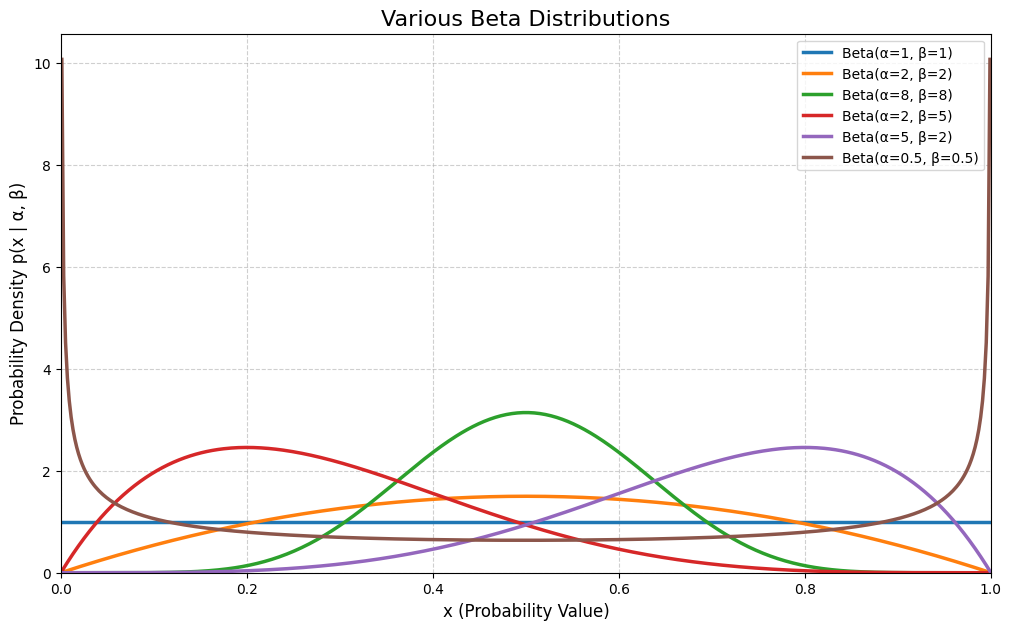

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range of x values (probabilities from 0 to 1)
# Avoid exact 0 and 1 for cases where alpha or beta < 1 (PDF goes to infinity)
x = np.linspace(0.001, 0.999, 500)

# --- Parameter Pairs to Plot ---
params = [
    (1, 1),     # Uniform (Flat)
    (2, 2),     # Symmetric, peaked at 0.5 (weakly confident fair coin)
    (8, 8),     # Symmetric, more peaked at 0.5 (more confident fair coin)
    (2, 5),     # Skewed towards 0 (belief in tails bias)
    (5, 2),     # Skewed towards 1 (belief in heads bias)
    (0.5, 0.5)  # U-shaped (belief concentrated near 0 and 1)
]

# --- Create the Plot ---
plt.figure(figsize=(12, 7))

for alpha_val, beta_val in params:
    # Calculate the PDF using scipy.stats.beta
    y = beta.pdf(x, alpha_val, beta_val)
    
    # Plot the PDF
    plt.plot(x, y, label=f"Beta(α={alpha_val}, β={beta_val})", lw=2.5) # lw for linewidth

# --- Customize the Plot ---
plt.title("Various Beta Distributions", fontsize=16)
plt.xlabel("x (Probability Value)", fontsize=12)
plt.ylabel("Probability Density p(x | α, β)", fontsize=12)

# Set axis limits - might need adjustment depending on peak heights
plt.xlim(0, 1)
plt.ylim(bottom=0, top=max(7, plt.ylim()[1])) # Ensure y starts at 0, adjust top if needed

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Show the Plot ---
plt.show()

Prior parameters (α₀, β₀): (1, 1)
Prior PDF p(θ=0.6|M): 1.0000


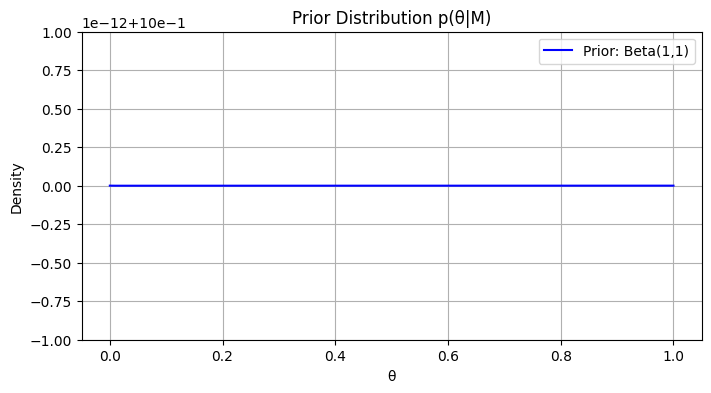

In [15]:
# Prior hyperparameters (alpha_0, beta_0)
alpha_prior = 1
beta_prior = 1

# Function to calculate prior PDF value(s)
def prior_pdf(theta, alpha, beta_):
    """Calculates the Beta PDF for given theta."""
    return beta.pdf(theta, alpha, beta_)

# Calculate prior density at theta_example
prior_at_theta_example = prior_pdf(theta_example, alpha_prior, beta_prior)

print(f"Prior parameters (α₀, β₀): ({alpha_prior}, {beta_prior})")
print(f"Prior PDF p(θ={theta_example}|M): {prior_at_theta_example:.4f}")
# For the Uniform Beta(1,1) prior, the PDF is 1 everywhere in (0,1)
# Note: Scipy might give slightly different values at the boundaries 0 or 1.

# Calculate prior over a range (useful for plotting)
prior_values = prior_pdf(theta_range, alpha_prior, beta_prior)

# Plot the prior
plt.figure(figsize=(8, 4))
plt.plot(theta_range, prior_values, label=f'Prior: Beta({alpha_prior},{beta_prior})', color='blue')
plt.title('Prior Distribution p(θ|M)')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## 2. Likelihood Function: $ p(D | \theta, M) $ 

This represents the probability of observing our specific data ($ k=7 $ heads in $ n=10 $ flips) given a *particular* value of the coin's bias $ \theta $ . For a fixed $ D $ , we view this as a function of $ \theta $ . The standard function here is the Binomial probability mass function (PMF).

*   **Meaning**: How well does a specific hypothesis $ \theta $ explain the observed data $ D $ ?
*   **Mathematical Form**: $ p(D | \theta, M) = \binom{n}{k} \theta^k (1-\theta)^{n-k} $ 


--- 2. Likelihood Function p(D|θ,M) ---
Data D: n=10, k=7
Likelihood p(D|θ=0.6, M): 0.2150


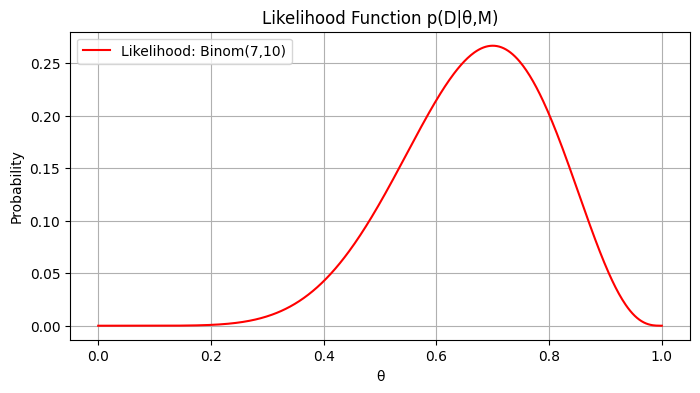

In [19]:
print("\n--- 2. Likelihood Function p(D|θ,M) ---")

# Function to calculate likelihood value(s)
def likelihood_func(data, theta):
  """Calculates the Binomial likelihood P(data|theta)."""
  n = data['n']
  k = data['k']
  # Using scipy's binom.pmf is numerically stable
  # Note: For visualization or optimization, we often only need the part
  # proportional to theta^k * (1-theta)^(n-k), but here we calculate
  # the actual probability mass.
  return binom.pmf(k, n, theta)

# Calculate likelihood at theta_example
likelihood_at_theta_example = likelihood_func(data_D, theta_example)

print(f"Data D: n={data_D['n']}, k={data_D['k']}")
print(f"Likelihood p(D|θ={theta_example}, M): {likelihood_at_theta_example:.4f}")

# Calculate likelihood over a range (useful for plotting)
likelihood_values = likelihood_func(data_D, theta_range)

# 2. Plot Likelihood
plt.figure(figsize=(8, 4))
plt.plot(theta_range, likelihood_values, label=f'Likelihood: Binom({data_D["k"]},{data_D["n"]})', color='red')
plt.title('Likelihood Function p(D|θ,M)')
plt.xlabel('θ')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

## 3. Evidence (Marginal Likelihood): $ p(D | M) $ 

This is the probability of observing the data $ D $ under model $ M $ , integrated over all possible parameter values $ \theta $ . It acts as the normalization constant in Bayes' theorem.

*   **Meaning**: Overall, how likely was the observed data under this model $ M $ , considering all possibilities for $ \theta $ weighted by the prior?
*   **Mathematical Form**: $ p(D | M) = \int_0^1 p(D | \theta, M) p(\theta | M) d\theta $ </br>
$ p(D | M) = \int_0^1 \left[ \binom{n}{k} \theta^k (1-\theta)^{n-k} \right] \left[ \frac{1}{B(\alpha_0, \beta_0)} \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1} \right] d\theta $ </br>
$ p(D | M) = \binom{n}{k} \frac{1}{\beta(\alpha_0, \beta_0)} \int_0^1 \theta^{k + \alpha_0 - 1} (1-\theta)^{n - k + \beta_0 - 1} d\theta $ 
*   The integral is the definition of the Beta function $ \beta(k + \alpha_0, n - k + \beta_0)$ .
    *   Substituting this back gives:
        $ p(D | M) = \binom{n}{k} \frac{\beta(k + \alpha_0, n - k + \beta_0)}{\beta(\alpha_0, \beta_0)} $ 
*  **Beta Function Definition:** The definition of the Beta function in terms of Gamma functions is $ \beta(x, y) = \frac{\Gamma(x)\Gamma(y)}{\Gamma(x+y)} $ 

For the Beta-Binomial case (Beta prior, Binomial likelihood), this integral has a closed-form solution related to the Beta function $ \beta(\cdot, \cdot) $ :
$ p(D | M) = \binom{n}{k} \frac{\beta(k + \alpha_0, n - k + \beta_0)}{\beta(\alpha_0, \beta_0)} $ 
where $ \beta(x, y) = \frac{\Gamma(x)\Gamma(y)}{\Gamma(x+y)} $ .

In [22]:
print("\n--- 3. Evidence p(D|M) ---")

# Function to calculate evidence (using the analytical solution for Beta-Binomial)
def evidence(data, alpha_pr, beta_pr):
  """Calculates the marginal likelihood p(D|M)."""
  n = data['n']
  k = data['k']
  
  # Calculate the combinatorial term C(n, k)
  # Using log-gamma functions for numerical stability is often preferred for large n, k
  # but scipy.special.binom is fine here.
  from scipy.special import binom as combinations
  comb_term = combinations(n, k)
  
  # Calculate using Beta function B(x,y)
  numerator_beta = beta_function(k + alpha_pr, n - k + beta_pr)
  denominator_beta = beta_function(alpha_pr, beta_pr)
  
  # Avoid division by zero if denominator is zero (can happen for certain priors)
  if denominator_beta == 0:
      # This case needs careful handling, maybe indicative of an improper prior 
      # or extreme data. For Beta(1,1) this won't happen.
      # Using numerical integration as an alternative:
      from scipy.integrate import quad
      integrand = lambda t: likelihood_func(data, t) * prior_pdf(t, alpha_pr, beta_pr)
      result, _ = quad(integrand, 0, 1)
      return result

  evidence_val = comb_term * (numerator_beta / denominator_beta)
  return evidence_val

# Calculate the evidence
evidence_value = evidence(data_D, alpha_prior, beta_prior)

print(f"Evidence p(D|M): {evidence_value:.4f}")

# Alternative: Numerical Integration (should give the same result)
from scipy.integrate import quad
integrand = lambda t: likelihood_func(data_D, t) * prior_pdf(t, alpha_prior, beta_prior)
evidence_numerical, _ = quad(integrand, 0, 1)
print(f"Evidence p(D|M) (numerical): {evidence_numerical:.4f}")

# Note: The evidence is a single number, not a function of theta.


--- 3. Evidence p(D|M) ---
Evidence p(D|M): 0.0909
Evidence p(D|M) (numerical): 0.0909



--- 3. Evidence p(D|M) ---
Evidence p(D|M): 0.0909
Evidence p(D|M) (numerical): 0.0909


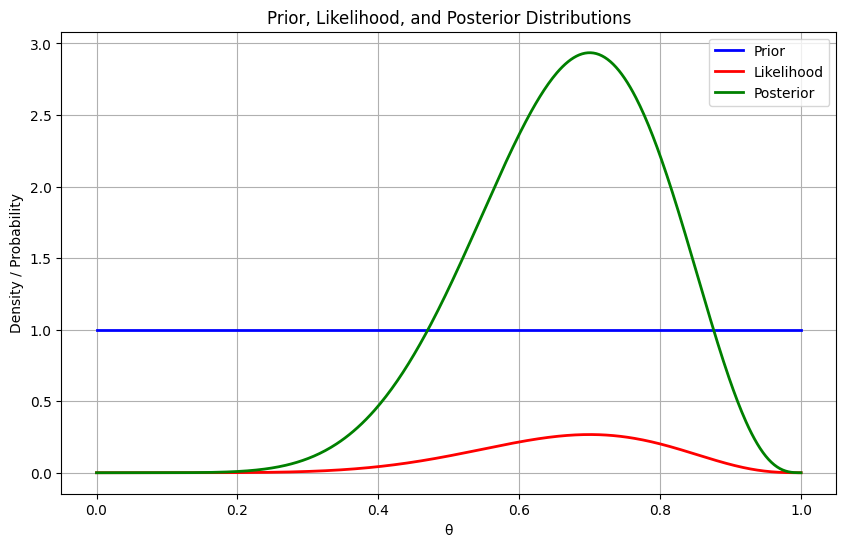

In [21]:
print("\n--- 3. Evidence p(D|M) ---")

# Function to calculate evidence (using the analytical solution for Beta-Binomial)
def evidence(data, alpha_pr, beta_pr):
    """Calculates the marginal likelihood p(D|M)."""
    n = data['n']
    k = data['k']
    from scipy.special import binom as combinations
    comb_term = combinations(n, k)
    numerator_beta = beta_function(k + alpha_pr, n - k + beta_pr)
    denominator_beta = beta_function(alpha_pr, beta_pr)
    if denominator_beta == 0:
        from scipy.integrate import quad
        integrand = lambda t: likelihood_func(data, t) * prior_pdf(t, alpha_pr, beta_pr)
        result, _ = quad(integrand, 0, 1)
        return result
    evidence_val = comb_term * (numerator_beta / denominator_beta)
    return evidence_val

# Calculate the evidence
evidence_value = evidence(data_D, alpha_prior, beta_prior)
print(f"Evidence p(D|M): {evidence_value:.4f}")

# Alternative: Numerical Integration (should give the same result)
from scipy.integrate import quad
integrand = lambda t: likelihood_func(data_D, t) * prior_pdf(t, alpha_prior, beta_prior)
evidence_numerical, _ = quad(integrand, 0, 1)
print(f"Evidence p(D|M) (numerical): {evidence_numerical:.4f}")

# Plot prior, likelihood, and posterior together
plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior, label='Prior', color='blue', lw=2)
plt.plot(theta_range, binom.pmf(n_heads, n_trials, theta_range), label='Likelihood', color='red', lw=2)
plt.plot(theta_range, posterior, label='Posterior', color='green', lw=2)
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('θ')
plt.ylabel('Density / Probability')
plt.legend()
plt.grid(True)
plt.show()


## 4. Posterior PDF: $ p(\theta | D, M) $ 

This is our updated belief about $ \theta $ after considering the data $ D $ . It's obtained by combining the prior and the likelihood using Bayes' theorem.

*   **Meaning**: Given the observed flips, what is the probability distribution for the coin's bias $ \theta $ ?
*   **Mathematical Form**: $ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} $ 

For the Beta-Binomial case, the posterior distribution is also a Beta distribution:
$ p(\theta | D, M) = \text{Beta}(\theta | k + \alpha_0, n - k + \beta_0) $ </br>
Let $ \alpha_n = k + \alpha_0 $ and $ \beta_n = n - k + \beta_0 $ . </br>
$ p(\theta | D, M) = \frac{\Gamma(\alpha_n + \beta_n)}{\Gamma(\alpha_n)\Gamma(\beta_n)} \theta^{\alpha_n-1} (1-\theta)^{\beta_n-1} $ 

In [ ]:
print("\n--- 4. Posterior PDF p(θ|D,M) ---")

# Posterior hyperparameters (alpha_n, beta_n)
alpha_posterior = n_heads + alpha_prior
beta_posterior = (n_trials - n_heads) + beta_prior

# Function to calculate posterior PDF value(s)
def posterior_pdf(theta, alpha_post, beta_post):
  """Calculates the posterior Beta PDF."""
  return beta.pdf(theta, alpha_post, beta_post)

# Calculate posterior density at theta_example
posterior_at_theta_example = posterior_pdf(theta_example, alpha_posterior, beta_posterior)

print(f"Posterior parameters (αₙ, βₙ): ({alpha_posterior}, {beta_posterior})")
print(f"Posterior PDF p(θ={theta_example}|D, M): {posterior_at_theta_example:.4f}")

# Calculate posterior over a range (useful for plotting)
posterior_values = posterior_pdf(theta_range, alpha_posterior, beta_posterior)

# --- Verification: Check Bayes' Theorem calculation ---
# Posterior = (Likelihood * Prior) / Evidence
numerator_at_theta_example = likelihood_at_theta_example * prior_at_theta_example
posterior_calculated = numerator_at_theta_example / evidence_value

print(f"\n--- Verification ---")
print(f"Likelihood * Prior at θ={theta_example}: {numerator_at_theta_example:.4e}")
print(f"Evidence: {evidence_value:.4e}")
print(f"Posterior p(θ={theta_example}|D,M) calculated via Bayes' Thm: {posterior_calculated:.4f}")
print(f"Posterior p(θ={theta_example}|D,M) from Beta({alpha_posterior},{beta_posterior}) PDF: {posterior_at_theta_example:.4f}")
# These two values should be very close (any difference due to floating point precision)


--- 4. Posterior PDF p(θ|D,M) ---
Posterior parameters (αₙ, βₙ): (8, 4)
Posterior PDF p(θ=0.6|D, M): 2.3649

--- Verification ---
Likelihood * Prior at θ=0.6: 2.1499e-01
Evidence: 9.0909e-02
Posterior p(θ=0.6|D,M) calculated via Bayes' Thm: 2.3649
Posterior p(θ=0.6|D,M) from Beta(8,4) PDF: 2.3649


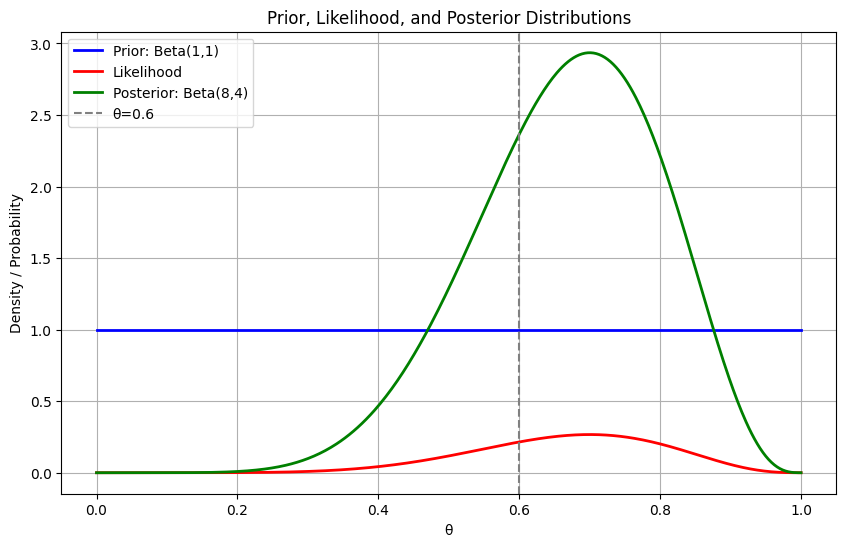

In [24]:
print("\n--- 4. Posterior PDF p(θ|D,M) ---")

# Posterior hyperparameters (alpha_n, beta_n)
alpha_posterior = n_heads + alpha_prior
beta_posterior = (n_trials - n_heads) + beta_prior

# Function to calculate posterior PDF value(s)
def posterior_pdf(theta, alpha_post, beta_post):
    """Calculates the posterior Beta PDF."""
    return beta.pdf(theta, alpha_post, beta_post)

# Calculate posterior density at theta_example
posterior_at_theta_example = posterior_pdf(theta_example, alpha_posterior, beta_posterior)

print(f"Posterior parameters (αₙ, βₙ): ({alpha_posterior}, {beta_posterior})")
print(f"Posterior PDF p(θ={theta_example}|D, M): {posterior_at_theta_example:.4f}")

# Calculate posterior over a range (useful for plotting)
posterior_values = posterior_pdf(theta_range, alpha_posterior, beta_posterior)

# --- Verification: Check Bayes' Theorem calculation ---
# Posterior = (Likelihood * Prior) / Evidence
numerator_at_theta_example = likelihood_at_theta_example * prior_at_theta_example
posterior_calculated = numerator_at_theta_example / evidence_value

print(f"\n--- Verification ---")
print(f"Likelihood * Prior at θ={theta_example}: {numerator_at_theta_example:.4e}")
print(f"Evidence: {evidence_value:.4e}")
print(f"Posterior p(θ={theta_example}|D,M) calculated via Bayes' Thm: {posterior_calculated:.4f}")
print(f"Posterior p(θ={theta_example}|D,M) from Beta({alpha_posterior},{beta_posterior}) PDF: {posterior_at_theta_example:.4f}")
# These two values should be very close (any difference due to floating point precision)

# --- Plots for step-by-step example ---
plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior, label='Prior: Beta(1,1)', color='blue', lw=2)
plt.plot(theta_range, binom.pmf(n_heads, n_trials, theta_range), label='Likelihood', color='red', lw=2)
plt.plot(theta_range, posterior_values, label=f'Posterior: Beta({alpha_posterior},{beta_posterior})', color='green', lw=2)
plt.axvline(theta_example, color='gray', linestyle='--', label=f'θ={theta_example}')
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('θ')
plt.ylabel('Density / Probability')
plt.legend()
plt.grid(True)
plt.show()

This example demonstrates how each term in Bayes' theorem contributes to updating our knowledge about the parameter $ \theta $ from the prior belief to the posterior belief, using the likelihood derived from the data and normalized by the evidence. The choice of a conjugate prior (Beta for Binomial) simplifies the calculation, as the posterior distribution belongs to the same family as the prior. In more complex scenarios, numerical methods like Markov Chain Monte Carlo (MCMC) are often required to approximate the posterior distribution.

### Posterior: $ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} $ 

MCMC (Markov Chain Monte Carlo) is a computational technique used to **sample from** a probability distribution, especially when the distribution is complex or high-dimensional and cannot be easily described or calculated analytically.

In the context of Bayes' Theorem:

$ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} $ 

1.  We often *can* evaluate the **Likelihood** $ p(D | \theta, M) $ for a given $ \theta $ .
2.  We often *can* evaluate the **Prior** $ p(\theta | M) $ for a given $ \theta $ .
3.  Therefore, we can evaluate the *numerator*: $ p(D | \theta, M) p(\theta | M) $ .
4.  The **Evidence** $ p(D | M) = \int p(D | \theta, M) p(\theta | M) d\theta $ involves an integral (or sum) over all possible $ \theta $ . This integral is often high-dimensional and analytically intractable (impossible or extremely difficult to calculate directly).
5.  Notice that the **Posterior** $ p(\theta | D, M) $ is *proportional* to the numerator: $ p(\theta | D, M) \propto p(D | \theta, M) p(\theta | M) $ . The Evidence $ p(D | M) $ is just a normalization constant that makes the posterior integrate to 1.

**How MCMC fits in:**

MCMC algorithms (like Metropolis-Hastings or Gibbs Sampling) are designed to draw samples from a target distribution even if we only know that distribution *up to a constant of proportionality*.

Therefore, MCMC allows us to generate a large set of samples $ \{\theta_1, \theta_2, ..., \theta_N\} $ that are effectively drawn *from* the **Posterior PDF** $ p(\theta | D, M) $ , *without ever needing to calculate the difficult Evidence term* $ p(D | M) $ .

**Conclusion:**

MCMC doesn't substitute a *single term* in the equation in the sense of replacing it with a value. Instead, MCMC provides a computational method to **approximate or sample from the entire Posterior PDF $ p(\theta | D, M) $ **. It essentially bypasses the need to calculate the Evidence $ p(D | M) $ by directly generating samples whose distribution converges to the true posterior distribution.

So, the most accurate answer is that MCMC is used to **obtain the Posterior PDF $ p(\theta | D, M) $ ** (in the form of samples) when direct calculation is intractable, primarily due to the difficulty of computing the Evidence $ p(D | M) $ .

In [9]:
# --- Example Setup ---
# Data D: Number of trials (n) and number of successes/heads (k)
n_trials = 10
n_heads = 7
data_D = {'n': n_trials, 'k': n_heads}

In [10]:
# Prior hyperparameters (alpha_0, beta_0)
alpha_prior = 1
beta_prior = 1

# Function to calculate prior PDF value(s)
def prior_pdf(theta, alpha, beta_):
    """Calculates the Beta PDF for given theta."""
    return beta.pdf(theta, alpha, beta_)

# Calculate prior density at theta_example
prior_at_theta_example = prior_pdf(theta_example, alpha_prior, beta_prior)


--- 2. Likelihood Function p(D|θ,M) ---
Data D: n=10, k=7
Likelihood p(D|θ=0.6, M): 0.2150


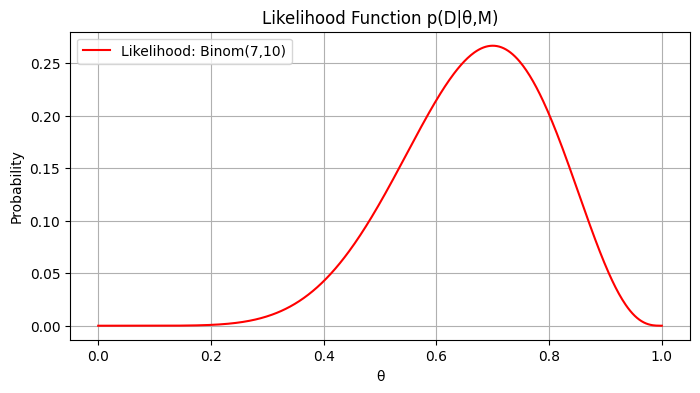

In [12]:
print("\n--- 2. Likelihood Function p(D|θ,M) ---")

# Function to calculate likelihood value(s)
def likelihood_func(data, theta):
  """Calculates the Binomial likelihood P(data|theta)."""
  n = data['n']
  k = data['k']
  # Using scipy's binom.pmf is numerically stable
  # Note: For visualization or optimization, we often only need the part
  # proportional to theta^k * (1-theta)^(n-k), but here we calculate
  # the actual probability mass.
  return binom.pmf(k, n, theta)

# Calculate likelihood at theta_example
likelihood_at_theta_example = likelihood_func(data_D, theta_example)

print(f"Data D: n={data_D['n']}, k={data_D['k']}")
print(f"Likelihood p(D|θ={theta_example}, M): {likelihood_at_theta_example:.4f}")

# Calculate likelihood over a range (useful for plotting)
likelihood_values = likelihood_func(data_D, theta_range)

# 2. Plot Likelihood
plt.figure(figsize=(8, 4))
plt.plot(theta_range, likelihood_values, label=f'Likelihood: Binom({data_D["k"]},{data_D["n"]})', color='red')
plt.title('Likelihood Function p(D|θ,M)')
plt.xlabel('θ')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


--- 3. Evidence p(D|M) ---
Evidence p(D|M): 0.0909
Evidence p(D|M) (numerical): 0.0909


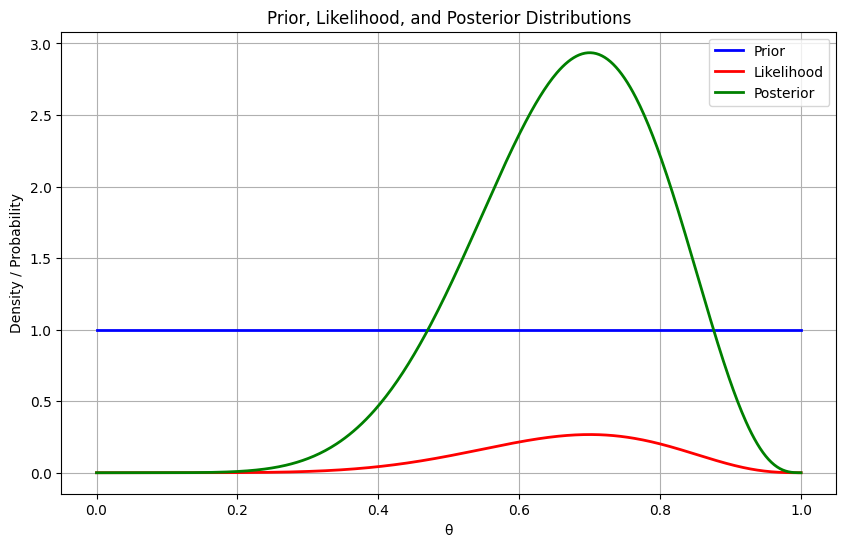

In [14]:
print("\n--- 3. Evidence p(D|M) ---")

# Function to calculate evidence (using the analytical solution for Beta-Binomial)
def evidence(data, alpha_pr, beta_pr):
    """Calculates the marginal likelihood p(D|M)."""
    n = data['n']
    k = data['k']
    from scipy.special import binom as combinations
    comb_term = combinations(n, k)
    numerator_beta = beta_function(k + alpha_pr, n - k + beta_pr)
    denominator_beta = beta_function(alpha_pr, beta_pr)
    if denominator_beta == 0:
        from scipy.integrate import quad
        integrand = lambda t: likelihood_func(data, t) * prior_pdf(t, alpha_pr, beta_pr)
        result, _ = quad(integrand, 0, 1)
        return result
    evidence_val = comb_term * (numerator_beta / denominator_beta)
    return evidence_val

# Calculate the evidence
evidence_value = evidence(data_D, alpha_prior, beta_prior)
print(f"Evidence p(D|M): {evidence_value:.4f}")

# Alternative: Numerical Integration (should give the same result)
from scipy.integrate import quad
integrand = lambda t: likelihood_func(data_D, t) * prior_pdf(t, alpha_prior, beta_prior)
evidence_numerical, _ = quad(integrand, 0, 1)
print(f"Evidence p(D|M) (numerical): {evidence_numerical:.4f}")

# Plot prior, likelihood, and posterior together
plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior, label='Prior', color='blue', lw=2)
plt.plot(theta_range, binom.pmf(n_heads, n_trials, theta_range), label='Likelihood', color='red', lw=2)
plt.plot(theta_range, posterior, label='Posterior', color='green', lw=2)
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('θ')
plt.ylabel('Density / Probability')
plt.legend()
plt.grid(True)
plt.show()



--- 4. Posterior PDF p(θ|D,M) ---
Posterior parameters (αₙ, βₙ): (8, 4)
Posterior PDF p(θ=0.6|D, M): 2.3649

--- Verification ---
Likelihood * Prior at θ=0.6: 2.1499e-01
Evidence: 9.0909e-02
Posterior p(θ=0.6|D,M) calculated via Bayes' Thm: 2.3649
Posterior p(θ=0.6|D,M) from Beta(8,4) PDF: 2.3649


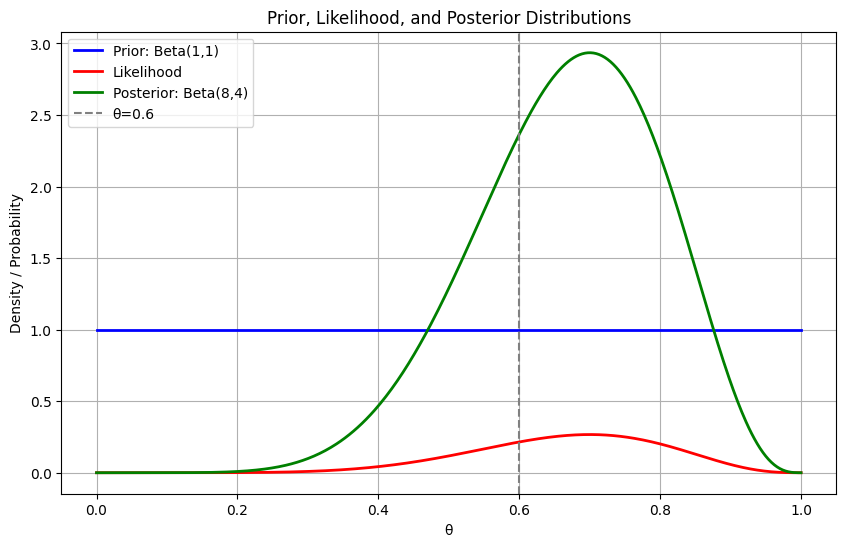

In [ ]:
print("\n--- 4. Posterior PDF p(θ|D,M) ---")

# Posterior hyperparameters (alpha_n, beta_n)
alpha_posterior = n_heads + alpha_prior
beta_posterior = (n_trials - n_heads) + beta_prior

# Function to calculate posterior PDF value(s)
def posterior_pdf(theta, alpha_post, beta_post):
    """Calculates the posterior Beta PDF."""
    return beta.pdf(theta, alpha_post, beta_post)

# Calculate posterior density at theta_example
posterior_at_theta_example = posterior_pdf(theta_example, alpha_posterior, beta_posterior)

print(f"Posterior parameters (αₙ, βₙ): ({alpha_posterior}, {beta_posterior})")
print(f"Posterior PDF p(θ={theta_example}|D, M): {posterior_at_theta_example:.4f}")

# Calculate posterior over a range (useful for plotting)
posterior_values = posterior_pdf(theta_range, alpha_posterior, beta_posterior)

# --- Verification: Check Bayes' Theorem calculation ---
# Posterior = (Likelihood * Prior) / Evidence
numerator_at_theta_example = likelihood_at_theta_example * prior_at_theta_example
posterior_calculated = numerator_at_theta_example / evidence_value

print(f"\n--- Verification ---")
print(f"Likelihood * Prior at θ={theta_example}: {numerator_at_theta_example:.4e}")
print(f"Evidence: {evidence_value:.4e}")
print(f"Posterior p(θ={theta_example}|D,M) calculated via Bayes' Thm: {posterior_calculated:.4f}")
print(f"Posterior p(θ={theta_example}|D,M) from Beta({alpha_posterior},{beta_posterior}) PDF: {posterior_at_theta_example:.4f}")
# These two values should be very close (any difference due to floating point precision)

# --- Plots for step-by-step example ---
plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior, label='Prior: Beta(1,1)', color='blue', lw=2)
plt.plot(theta_range, binom.pmf(n_heads, n_trials, theta_range), label='Likelihood', color='red', lw=2)
plt.plot(theta_range, posterior_values, label=f'Posterior: Beta({alpha_posterior},{beta_posterior})', color='green', lw=2)
plt.axvline(theta_example, color='gray', linestyle='--', label=f'θ={theta_example}')
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('θ')
plt.ylabel('Density / Probability')
plt.legend()
plt.grid(True)
plt.show()

# MCMC Example

We'll use the classic problem of estimating the bias ($ \theta $ ) of a coin given some observed flips ($ D $ ).

**Scenario:**

*   We flip a coin $ N=20 $ times.
*   We observe $ n_H=15 $ heads.
*   Our data is $ D = (N=20, n_H=15) $ .
*   Our parameter is $ \theta $ , the probability of getting heads ($ 0 \le \theta \le 1 $ ).
*   Our model $ M $ is the assumption that the flips are independent Bernoulli trials (a Binomial process).

**1. Define the Prior $ p(\theta | M) $ **

Let's assume a relatively uninformative prior belief about the coin's bias. A Beta distribution is a common choice for probabilities as it's defined on $ [0, 1] $ . We'll use a Beta(α=2, β=2) prior, which slightly favors fair coins but allows for bias.

$ p(\theta | M) = \text{Beta}(\theta | \alpha=2, \beta=2) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} = \frac{\Gamma(4)}{\Gamma(2)\Gamma(2)} \theta^{1} (1-\theta)^{1} = 6 \theta (1-\theta) $ 

**2. Define the Likelihood $ p(D | \theta, M) $ **

Given a specific bias $ \theta $ , the probability of observing $ n_H $ heads in $ N $ flips follows a Binomial distribution:

$ p(D | \theta, M) = \text{Binomial}(n_H | N, \theta) = \binom{N}{n_H} \theta^{n_H} (1-\theta)^{N-n_H} $ 
$ p(D | \theta, M) = \binom{20}{15} \theta^{15} (1-\theta)^{5} = 15504 \, \theta^{15} (1-\theta)^{5} $ 

**3. Calculate the Evidence $ p(D | M) $ **

The Evidence is the integral of the likelihood times the prior over all possible values of $ \theta $ :

$ p(D | M) = \int_0^1 p(D | \theta, M) p(\theta | M) d\theta $ 
$ p(D | M) = \int_0^1 \left[ \binom{N}{n_H} \theta^{n_H} (1-\theta)^{N-n_H} \right] \left[ \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right] d\theta $ 
$ p(D | M) = \binom{N}{n_H} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \int_0^1 \theta^{n_H + \alpha - 1} (1-\theta)^{N - n_H + \beta - 1} d\theta $ 

Recognize that the integral is related to the Beta function $ B(x, y) = \int_0^1 t^{x-1} (1-t)^{y-1} dt = \frac{\Gamma(x)\Gamma(y)}{\Gamma(x+y)} $ .
Here, $ x = n_H + \alpha $ and $ y = N - n_H + \beta $ .

$ p(D | M) = \binom{N}{n_H} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(n_H + \alpha)\Gamma(N - n_H + \beta)}{\Gamma(N + \alpha + \beta)} $ 

Plugging in our values ($ N=20, n_H=15, \alpha=2, \beta=2 $ ):
$ p(D | M) = \binom{20}{15} \frac{\Gamma(4)}{\Gamma(2)\Gamma(2)} \frac{\Gamma(15 + 2)\Gamma(20 - 15 + 2)}{\Gamma(20 + 2 + 2)} $ 
$ p(D | M) = 15504 \times \frac{3!}{1! \times 1!} \times \frac{\Gamma(17)\Gamma(7)}{\Gamma(24)} $ 
$ p(D | M) = 15504 \times 6 \times \frac{16! \times 6!}{23!} $ 

We can use `scipy.special` functions to calculate this:

In [18]:
import numpy as np
from scipy.special import comb, gamma, beta as beta_func # beta_func to avoid name clash

N = 20
n_H = 15
alpha_prior = 2
beta_prior = 2

# Calculate Evidence
term1 = comb(N, n_H)
term2 = gamma(alpha_prior + beta_prior) / (gamma(alpha_prior) * gamma(beta_prior))
term3_integral = beta_func(n_H + alpha_prior, N - n_H + beta_prior) # B(x,y) = gamma(x)gamma(y)/gamma(x+y)

evidence = term1 * term2 * term3_integral

print(f"Prior parameters (alpha, beta): ({alpha_prior}, {beta_prior})")
print(f"Data (N, n_H): ({N}, {n_H})")
print(f"Calculated Evidence p(D|M): {evidence:.6g}")
# Output: Calculated Evidence p(D|M): 0.00288997

Prior parameters (alpha, beta): (2, 2)
Data (N, n_H): (20, 15)
Calculated Evidence p(D|M): 0.0542067


**Important Note:** We could calculate the evidence analytically here *because* we chose a Beta prior and a Binomial likelihood (a conjugate pair). For most complex models, this integral is intractable, which is precisely why MCMC is needed for the posterior.

**4. Calculate the Posterior $ p(\theta | D, M) $ using MCMC**

We know the posterior is proportional to the likelihood times the prior:
$ p(\theta | D, M) \propto p(D | \theta, M) p(\theta | M) $ 
$ p(\theta | D, M) \propto \left[ \theta^{n_H} (1-\theta)^{N-n_H} \right] \left[ \theta^{\alpha-1} (1-\theta)^{\beta-1} \right] $ 
$ p(\theta | D, M) \propto \theta^{n_H + \alpha - 1} (1-\theta)^{N - n_H + \beta - 1} $ 
$ p(\theta | D, M) \propto \theta^{15 + 2 - 1} (1-\theta)^{20 - 15 + 2 - 1} = \theta^{16} (1-\theta)^{6} $ 

This is the *kernel* of the posterior distribution. For MCMC (specifically Metropolis-Hastings), we only need a function proportional to the posterior density. It's often numerically better to work with log-probabilities:

$ \log[p(\theta | D, M)] \propto (n_H + \alpha - 1) \log(\theta) + (N - n_H + \beta - 1) \log(1-\theta) $ 

Let's implement Metropolis-Hastings:


MCMC Results:
Number of samples (post burn-in): 15000
Acceptance Rate: 0.831
Posterior Mean (from MCMC): 0.7052
Posterior 95% Credible Interval (from MCMC): [0.51165877 0.86230178]

Analytical Posterior (Beta(17, 7))
Analytical Mean: 0.7083
Analytical 95% Credible Interval: (0.5159480295975618, 0.8678971203019001)


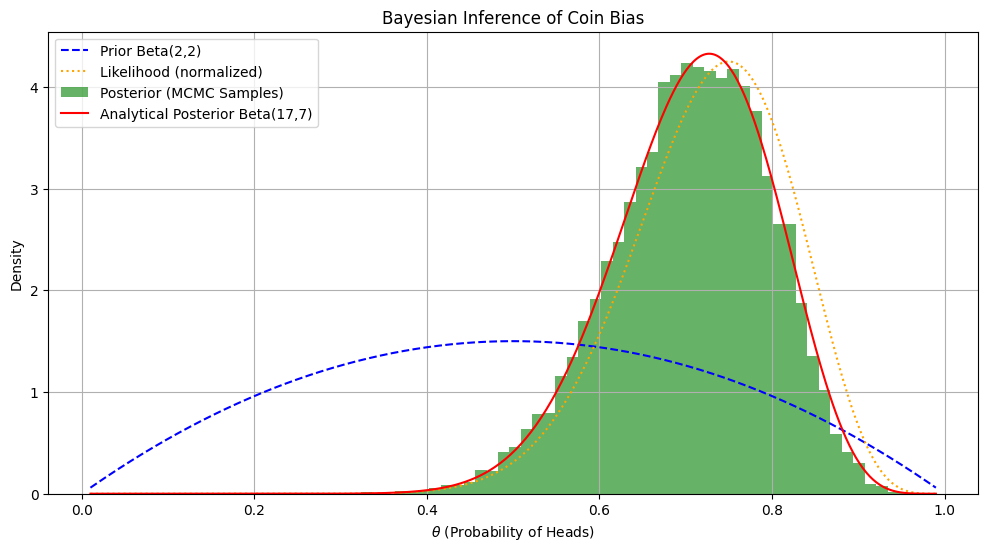

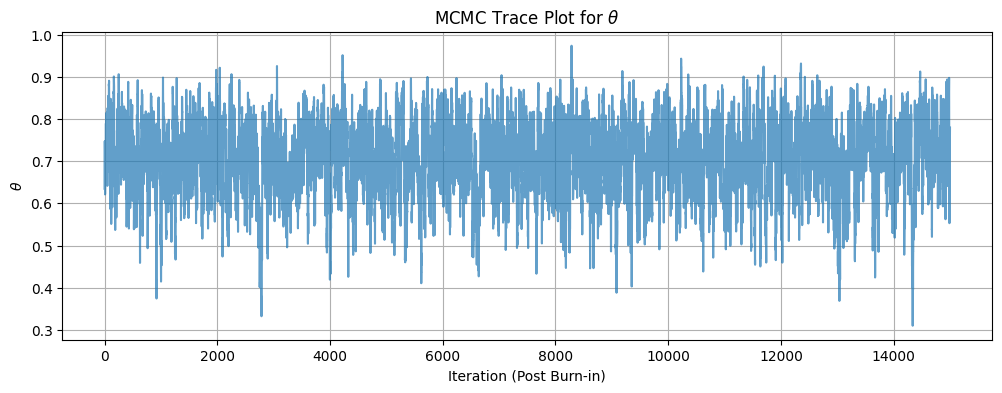

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, uniform
from scipy.special import comb, gamma, beta as beta_func

# --- Model Parameters & Data ---
N = 20
n_H = 15
alpha_prior = 2
beta_prior = 2

# --- Define Log Target (Unnormalized Log Posterior) ---
# Proportional to log(likelihood * prior)
def log_target(theta, n_H, N, alpha, beta_p):
    if theta <= 0 or theta >= 1: # Avoid log(0) and stay within bounds
        return -np.inf
    log_lik = n_H * np.log(theta) + (N - n_H) * np.log(1 - theta)
    log_prior = (alpha - 1) * np.log(theta) + (beta_p - 1) * np.log(1 - theta)
    # We can ignore constant terms like comb(N,n_H) and prior normalization
    return log_lik + log_prior

# --- MCMC Settings ---
n_samples = 20000
burn_in = 5000
proposal_std = 0.05 # Tune this for reasonable acceptance rate
theta_current = 0.5 # Starting point
samples = []
accepted_count = 0

# --- Metropolis-Hastings Sampler ---
for i in range(n_samples):
    # Propose a new theta
    theta_proposal = norm.rvs(loc=theta_current, scale=proposal_std)

    # Calculate acceptance probability (in log space)
    log_p_current = log_target(theta_current, n_H, N, alpha_prior, beta_prior)
    log_p_proposal = log_target(theta_proposal, n_H, N, alpha_prior, beta_prior)

    # Check if proposal is valid before calculating acceptance ratio
    if np.isinf(log_p_proposal):
         log_acceptance_ratio = -np.inf # Automatically reject invalid proposals
    else:
        log_acceptance_ratio = log_p_proposal - log_p_current
        # Note: Proposal distribution N(theta|theta_current, std) is symmetric,
        # so q(theta'|theta)/q(theta|theta') = 1, and doesn't appear in the ratio.

    # Accept or reject
    log_u = np.log(uniform.rvs())
    if log_u < log_acceptance_ratio:
        theta_current = theta_proposal
        if i >= burn_in: # Only count acceptance after burn-in
             accepted_count += 1

    # Store sample (after burn-in)
    if i >= burn_in:
        samples.append(theta_current)

samples = np.array(samples)
acceptance_rate = accepted_count / (n_samples - burn_in)

print(f"\nMCMC Results:")
print(f"Number of samples (post burn-in): {len(samples)}")
print(f"Acceptance Rate: {acceptance_rate:.3f}") # Aim for ~0.2 - 0.5
print(f"Posterior Mean (from MCMC): {np.mean(samples):.4f}")
print(f"Posterior 95% Credible Interval (from MCMC): {np.percentile(samples, [2.5, 97.5])}")

# --- Analytical Posterior (for comparison) ---
# Because we used a conjugate prior, the posterior is also Beta
alpha_post = n_H + alpha_prior     # 15 + 2 = 17
beta_post = N - n_H + beta_prior # 20 - 15 + 2 = 7
analytical_posterior = beta(alpha_post, beta_post)
print(f"\nAnalytical Posterior (Beta({alpha_post}, {beta_post}))")
print(f"Analytical Mean: {analytical_posterior.mean():.4f}")
print(f"Analytical 95% Credible Interval: {analytical_posterior.interval(0.95)}")


# --- Visualization ---
plt.figure(figsize=(12, 6))
theta_range = np.linspace(0.01, 0.99, 500)

# Plot Prior
prior_pdf = beta(alpha_prior, beta_prior).pdf(theta_range)
plt.plot(theta_range, prior_pdf, label=f'Prior Beta({alpha_prior},{beta_prior})', color='blue', linestyle='--')

# Plot Likelihood (normalized to integrate to 1 for visualization)
# Note: This is p(D|theta), treated as a function of theta
likelihood_vals = [comb(N, n_H) * (t**n_H) * ((1-t)**(N-n_H)) for t in theta_range]
likelihood_norm = np.trapz(likelihood_vals, theta_range) # Simple normalization
plt.plot(theta_range, likelihood_vals / likelihood_norm, label=f'Likelihood (normalized)', color='orange', linestyle=':')

# Plot MCMC Posterior Histogram
plt.hist(samples, bins=50, density=True, label='Posterior (MCMC Samples)', color='green', alpha=0.6)

# Plot Analytical Posterior PDF
analytical_post_pdf = analytical_posterior.pdf(theta_range)
plt.plot(theta_range, analytical_post_pdf, label=f'Analytical Posterior Beta({alpha_post},{beta_post})', color='red')

plt.title('Bayesian Inference of Coin Bias')
plt.xlabel('$ \\theta$ (Probability of Heads)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot MCMC Trace
plt.figure(figsize=(12, 4))
plt.plot(samples, alpha=0.7)
plt.title('MCMC Trace Plot for $ \\theta$ ')
plt.xlabel('Iteration (Post Burn-in)')
plt.ylabel('$ \\theta$ ')
plt.grid(True)
plt.show()

**Summary of Results:**

1.  **Prior:** We defined it as Beta(2, 2). The plot shows its shape centered at 0.5 but fairly broad.
2.  **Likelihood:** Defined as Binomial(15 | 20, $ \theta $ ). The plot (normalized) shows it peaks strongly around $ \theta = 15/20 = 0.75 $ , reflecting the data.
3.  **Evidence:** Calculated analytically as $ p(D|M) \approx 0.00289 $ . This value tells us how likely the observed data is under our chosen model (Binomial likelihood) and prior (Beta(2,2)), averaged over all possible $ \theta $ .
4.  **Posterior:**
    *   **MCMC:** We generated thousands of samples $ \theta_i $ using Metropolis-Hastings. The histogram of these samples approximates the posterior distribution $ p(\theta | D, M) $ . The MCMC mean and credible interval provide summaries.
    *   **Analytical:** Because of conjugacy, we know the true posterior is Beta(17, 7). The plot shows the MCMC histogram closely matches the analytical Beta(17, 7) curve, confirming the MCMC worked correctly. The posterior mean is $ 17 / (17+7) \approx 0.708 $ , pulled slightly away from the raw data proportion (0.75) towards the prior mean (0.5).

This example shows how we calculate the prior and evidence (when possible) and how MCMC is used to generate samples that represent the posterior distribution, especially when the evidence and thus the posterior normalization constant are hard or impossible to compute directly.

### Note:
We could calculate the evidence analytically here *because* we chose a Beta prior and a Binomial likelihood (a conjugate pair). For most complex models, this integral is intractable, which is precisely why MCMC is needed for the posterior.

1.  **The Magic of Conjugate Pairs:**
    *   **Definition:** A prior distribution $ p(\theta|M) $ is called *conjugate* to a likelihood function $ p(D|\theta, M) $ if the resulting posterior distribution $ p(\theta|D, M) $ belongs to the *same family* of distributions as the prior.
    *   **Beta-Binomial Example:**
        *   Prior: $ p(\theta|M) = \text{Beta}(\theta | \alpha, \beta) \propto \theta^{\alpha-1} (1-\theta)^{\beta-1} $ 
        *   Likelihood: $ p(D|\theta, M) = \text{Binomial}(n_H | N, \theta) \propto \theta^{n_H} (1-\theta)^{N-n_H} $ 
        *   Posterior (unnormalized): $ p(\theta|D, M) \propto p(D|\theta, M) p(\theta|M) \propto \theta^{n_H+\alpha-1} (1-\theta)^{N-n_H+\beta-1} $ 
    *   **The Key Insight:** Notice that the mathematical *form* of the unnormalized posterior ($ \theta^{\text{something}-1}(1-\theta)^{\text{something else}-1} $ ) is exactly the form of a Beta distribution kernel. We instantly recognize that the normalized posterior must be $ \text{Beta}(\theta | n_H+\alpha, N-n_H+\beta) $ .

2.  **How Conjugacy Simplifies the Evidence Integral:**
    *   The evidence is $ p(D|M) = \int p(D|\theta, M) p(\theta|M) d\theta $ .
    *   In the conjugate case, we know: $ p(D|\theta, M) p(\theta|M) = C \times \text{PDF}_{\text{posterior}}(\theta) $ , where $ C $ is some constant (the normalization constant we're trying to find, which is the evidence!) and $ \text{PDF}_{\text{posterior}}(\theta) $ is the probability density function of the known posterior distribution (e.g., Beta($ n_H+\alpha, N-n_H+\beta $ )).
    *   So, $ p(D|M) = \int C \times \text{PDF}_{\text{posterior}}(\theta) d\theta $ .
    *   Since the integral of any valid PDF over its entire domain is 1 ($ \int \text{PDF}_{\text{posterior}}(\theta) d\theta = 1 $ ), we get $ p(D|M) = C $ .
    *   How do we find C? We calculated $ p(D|\theta, M) p(\theta|M) $ explicitly:
        $ p(D|\theta, M) p(\theta|M) = \left[ \binom{N}{n_H} \theta^{n_H} (1-\theta)^{N-n_H} \right] \left[ \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right] $ 
        $ = \left[ \binom{N}{n_H} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \right] \times \left[ \theta^{n_H+\alpha-1} (1-\theta)^{N-n_H+\beta-1} \right] $ 
    *   We also know the normalized posterior PDF is:
        $ \text{Beta}(\theta | n_H+\alpha, N-n_H+\beta) = \frac{\Gamma(N+\alpha+\beta)}{\Gamma(n_H+\alpha)\Gamma(N-n_H+\beta)} \theta^{n_H+\alpha-1} (1-\theta)^{N-n_H+\beta-1} $ 
    *   By comparing the two expressions above, we can see that the constant C (the evidence) must be:
        $ C = p(D|M) = \binom{N}{n_H} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(n_H+\alpha)\Gamma(N-n_H+\beta)}{\Gamma(N+\alpha+\beta)} $ 
        This matches the formula we derived earlier. The conjugacy allowed us to use the known normalization constant of the resulting posterior family to determine the value of the integral (the evidence).

3.  **Why Most Models Lead to Intractable Integrals:**
    *   **Lack of Conjugacy:** Most combinations of priors and likelihoods are *not* conjugate pairs. When you multiply $ p(D|\theta, M) $ and $ p(\theta|M) $ , the resulting function $ \theta $ doesn't simplify into the kernel of a standard, well-known distribution.
    *   **Complex Likelihoods:** Real-world likelihood functions can be very complex. They might involve output from computer simulations, solutions to differential equations, hierarchical structures, mixture models, etc. They often don't have simple, closed-form mathematical expressions like the Binomial PDF.
    *   **Complex Priors:** We might want to use priors that reflect complex prior knowledge, perhaps using non-parametric forms or mixtures, which don't fit neat conjugate families.
    *   **High Dimensionality:** Most interesting problems involve multiple parameters $ \theta = (\theta_1, \theta_2, ..., \theta_d) $ . The evidence calculation then becomes a multi-dimensional integral:
        $ p(D|M) = \int \dots \int p(D|\theta_1, ..., \theta_d, M) p(\theta_1, ..., \theta_d|M) d\theta_1 \dots d\theta_d $ 
    *   **Intractability Factors:**
        *   **No Analytical Solution:** For complex integrands (the product of likelihood and prior), finding a symbolic antiderivative is usually impossible.
        *   **Curse of Dimensionality:** Numerical integration methods (like quadrature grids) become computationally infeasible very quickly as the number of dimensions ($ d $ ) increases. The number of points needed grows exponentially ($ \sim k^d $ ).
        *   **Complex Geometry:** The posterior distribution might be multi-modal (have multiple peaks), have strong correlations between parameters (forming ridges), or have long tails, making it difficult for simple numerical methods to explore and integrate accurately.

4.  **MCMC to the Rescue:**
    *   MCMC methods (like Metropolis-Hastings) cleverly bypass the need to calculate the evidence $ p(D|M) $ .
    *   They only require the ability to evaluate something *proportional* to the posterior density, which is $ p(D|\theta, M) p(\theta|M) $ . We can usually compute the likelihood and the prior for any given $ \theta $ , so we can compute their product.
    *   MCMC algorithms generate a sequence of samples $ \{\theta_1, \theta_2, ...\} $ such that the distribution of these samples converges to the true posterior distribution $ p(\theta|D, M) $ .
    *   We get a representation of the posterior (the samples) without ever calculating the normalization constant (the evidence).

In essence, conjugate pairs are mathematically convenient exceptions. For the vast majority of realistic Bayesian models, the evidence integral is analytically and numerically intractable, making MCMC or other approximation techniques (like Variational Inference) essential tools for estimating the posterior distribution.